# "Relative Strength Index - RSI"
> "Relative Strength Index - RSI"

- toc: true
- branch: master
- badges: true
- comments: true
- author: Fernando Canepari
- categories: [fastpages, jupyter]

In [73]:
#Resumen

In [74]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf 

pd.options.mode.chained_assignment = None


In [75]:
tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
tickers = tickers.Symbol.to_list()

tickers = [i.replace('.','-') for i in tickers]

#For quick test
tickers = ['MMM',
 'ABT',
 'ABBV',
 'ABMD',
 'ACN',
 'ATVI',
 'ADBE',
 'AMD',
 'AAP',
 'AES',
 'AFL',
 'A',
 'APD',
 'AKAM']


tickers

['MMM',
 'ABT',
 'ABBV',
 'ABMD',
 'ACN',
 'ATVI',
 'ADBE',
 'AMD',
 'AAP',
 'AES',
 'AFL',
 'A',
 'APD',
 'AKAM']

In [76]:
def RSIcalc(asset):
    df = yf.download(asset, start='2011-01-01')
    df['MA200'] = df['Adj Close'].rolling(window=200).mean()
    df['price change'] = df['Adj Close'].pct_change()
    df['Upmove'] = df['price change'].apply(lambda x: x if x > 0 else 0)
    df['Downmove'] = df['price change'].apply(lambda x: abs(x) if x < 0 else 0)
    df['avg Up'] = df['Upmove'].ewm(span=19).mean()
    df['avg Down'] = df['Downmove'].ewm(span=19).mean()
    
    df = df.dropna()
    df['RS'] = df['avg Up']/df['avg Down']
    df['RSI'] = df['RS'].apply(lambda x: 100-(100/(x+1)))
    df.loc[(df['Adj Close'] > df['MA200']) & (df['RSI'] < 30), 'Buy'] = 'Yes'
    df.loc[(df['Adj Close'] < df['MA200']) | (df['RSI'] > 30), 'Buy'] = 'No'
    
    return df
    

In [77]:
def getSignals(df):
    Buying_dates = []
    Selling_dates = []
    
    for i in range(len(df) - 11):
        if "Yes" in df['Buy'].iloc[i]:
            Buying_dates.append(df.iloc[i+1].name)
            for j in range(1, 11):
                if df['RSI'].iloc[i + j] > 40:
                    Selling_dates.append(df.iloc[i+j+1].name)
                    break
                elif j == 10:
                    Selling_dates.append(df.iloc[i+j+1].name)
    
    return Buying_dates, Selling_dates


Test the code and the strategy with only the first asset

In [78]:
frame = RSIcalc(tickers[0])
buy, sell = getSignals(frame)

[*********************100%***********************]  1 of 1 completed


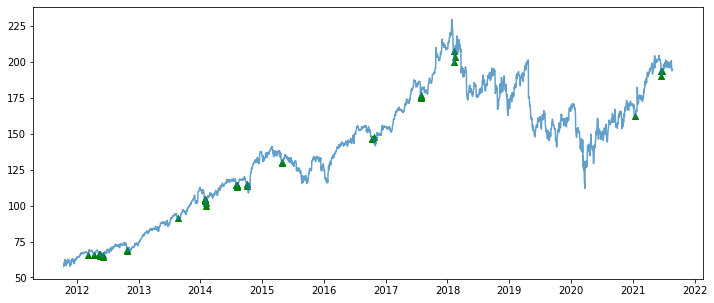

In [79]:
plt.figure(figsize=(12,5))
plt.scatter(frame.loc[buy].index, frame.loc[buy]['Adj Close'], marker='^', c='g')
plt.plot(frame['Adj Close'], alpha=0.7)


In [80]:

Profits = (frame.loc[sell].Open.values - frame.loc[buy].Open.values)/frame.loc[buy].Open.values

In [81]:
Profits

array([ 0.01841858,  0.01323802, -0.0115183 , -0.01105814,  0.00212315,
        0.01287556,  0.03632401,  0.02847867,  0.01033357,  0.01558087,
        0.01012236, -0.00346098,  0.00108178, -0.00407378,  0.02345979,
        0.01052883,  0.02759942,  0.00556546,  0.00556546,  0.01286469,
        0.0062834 ,  0.01170129,  0.01861865,  0.01306246,  0.0130085 ,
        0.01320242, -0.00076654,  0.00355307, -0.01841872,  0.01366927,
        0.02033747,  0.01195283,  0.01595001,  0.00852711,  0.02154845,
        0.00861573,  0.01892706, -0.0052846 ,  0.01409035,  0.01120925])

In [82]:
wins = [i for i in Profits if i > 0]

wins over total of placements 

In [83]:
len(wins)/len(Profits)

0.825

In [84]:

len(Profits)

40

Only 40 trades un 10 years.... but next, 
we are going to perform the previous steps for all the assets

In [100]:
matrixsignals = []
matrixprofits = []

for i in range(len(tickers)):
    frame = RSIcalc(tickers[i])
    buy, sell = getSignals(frame)
    Profits = (frame.loc[sell].Open.values - frame.loc[buy].Open.values)/frame.loc[buy].Open.values
    matrixsignals.append(buy)
    matrixprofits.append(Profits)
    
    
    
matrixsignalsbyAsset = dict(zip(tickers, matrixsignals))       
    
    
    

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [101]:
matrixsignalsbyAsset


{'MMM': [Timestamp('2012-03-07 00:00:00'),
  Timestamp('2012-04-11 00:00:00'),
  Timestamp('2012-05-15 00:00:00'),
  Timestamp('2012-05-16 00:00:00'),
  Timestamp('2012-05-18 00:00:00'),
  Timestamp('2012-05-21 00:00:00'),
  Timestamp('2012-06-05 00:00:00'),
  Timestamp('2012-06-06 00:00:00'),
  Timestamp('2012-10-24 00:00:00'),
  Timestamp('2012-10-25 00:00:00'),
  Timestamp('2013-08-22 00:00:00'),
  Timestamp('2014-01-27 00:00:00'),
  Timestamp('2014-01-28 00:00:00'),
  Timestamp('2014-01-29 00:00:00'),
  Timestamp('2014-01-31 00:00:00'),
  Timestamp('2014-02-03 00:00:00'),
  Timestamp('2014-02-04 00:00:00'),
  Timestamp('2014-08-01 00:00:00'),
  Timestamp('2014-08-04 00:00:00'),
  Timestamp('2014-08-06 00:00:00'),
  Timestamp('2014-08-07 00:00:00'),
  Timestamp('2014-08-08 00:00:00'),
  Timestamp('2014-10-02 00:00:00'),
  Timestamp('2014-10-03 00:00:00'),
  Timestamp('2015-04-30 00:00:00'),
  Timestamp('2015-05-01 00:00:00'),
  Timestamp('2016-10-12 00:00:00'),
  Timestamp('2016-10-

In [88]:
allprofit = []

for i in matrixprofits:
    for e in i:
        allprofit.append(e)
        

In [89]:
wins = [i for i in allprofit if i > 0]

In [90]:
len(wins)/len(allprofit)

0.7333333333333333

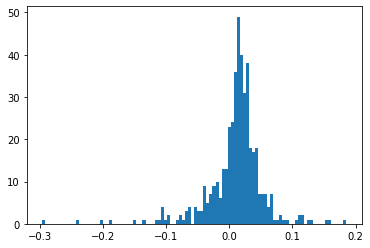

In [91]:
plt.hist(allprofit, bins=100)
plt.show()

In [92]:
for i in matrixsignals:
    for e in i:
        if e.year == 2021:
            print(e)

2021-01-12 00:00:00
2021-06-17 00:00:00
2021-06-18 00:00:00
2021-06-21 00:00:00
2021-03-05 00:00:00
2021-03-09 00:00:00
2021-05-05 00:00:00
2021-01-28 00:00:00
2021-05-06 00:00:00
2021-05-07 00:00:00
2021-05-10 00:00:00
2021-05-11 00:00:00
2021-05-12 00:00:00
2021-05-13 00:00:00
2021-05-14 00:00:00
2021-06-18 00:00:00
2021-06-21 00:00:00
2021-06-23 00:00:00
2021-06-24 00:00:00
2021-03-05 00:00:00
2021-08-05 00:00:00


Next steps: 

- Check previous days looking for buy signals, generate, date and asset to buy.
- Place orders in trading portals (e.g. etoro and test the results in "virtual" mode

